In [1]:
!pip install configparser
!pip install cufflinks
!pip install intrinio_sdk

You should consider upgrading via the 'pip install --upgrade pip' command.
You should consider upgrading via the 'pip install --upgrade pip' command.
You should consider upgrading via the 'pip install --upgrade pip' command.


**Configuration**

In [2]:
import intrinio_sdk
import configparser as cp

**Scientific Analysis**

In [4]:
import statsmodels.api as sm
import numpy as np
import pandas as pd
import cufflinks as cf 
import matplotlib.pyplot as plt
cf.set_config_file(offline=True)

**Secure method to load API credentials**

In [5]:
cfg = cp.ConfigParser()
cfg.read('../resources/credentials.cfg')

['../resources/credentials.cfg']

**Connect to Intrinio API using your sandbox API key**

In [6]:
API_KEY = cfg['intrinio']['app_key']

intrinio_sdk.ApiClient().configuration.api_key['api_key'] = API_KEY

security_api = intrinio_sdk.SecurityApi()

**Intrinio API Request**

In [7]:
# Goldman sachs & Morgan Stanley
identifier_gs= 'GS' 
identifier_ms= 'MS'
start_date = '2019-10-01' 
end_date = '2020-04-12' 
frequency = 'daily' 
page_size = 200
next_page = ''

In [15]:
response_gs = security_api.get_security_stock_prices(identifier_gs,
                                                  start_date = start_date,
                                                  end_date = end_date,
                                                    page_size = 200)
response_ms = security_api.get_security_stock_prices(identifier_ms,
                                                  start_date = start_date,
                                                  end_date = end_date,
                                                    page_size = 200)

In [16]:
response_gs.stock_prices[-1]

{'adj_close': 200.32872789153095,
 'adj_high': 206.94079158285436,
 'adj_low': 200.2496598653268,
 'adj_open': 204.59840130655593,
 'adj_volume': 3171507.0,
 'close': 202.69,
 'date': datetime.date(2019, 10, 1),
 'frequency': 'daily',
 'high': 209.38,
 'intraperiod': False,
 'low': 202.61,
 'open': 207.01,
 'volume': 3171507.0}

In [17]:
response_ms.security

{'code': 'EQS',
 'company_id': 'com_Wy1Z7g',
 'composite_figi': 'BBG000BLZRJ2',
 'composite_ticker': 'MS:US',
 'currency': 'USD',
 'figi': 'BBG000BLZT71',
 'id': 'sec_zJBkez',
 'name': 'Morgan Stanley',
 'share_class_figi': 'BBG001S9V5Z3',
 'ticker': 'MS'}

**Data Cleaning**

In [18]:
gs_stock = [p.to_dict() for p in response_gs.stock_prices]
ms_stock = [p.to_dict() for p in response_ms.stock_prices]

gs_df = pd.DataFrame.from_dict(gs_stock)
ms_df = pd.DataFrame.from_dict(ms_stock)

In [19]:
gs_df['secid'] = "Goldman Sachs"
gs_df.index = pd.DatetimeIndex(gs_df['date'])
gs_df = gs_df.drop('date',axis=1)
gs_df = gs_df.sort_index()
gs_df.shape

(133, 13)

In [20]:
ms_df['secid'] = "Morgan Stanley"
ms_df.index = pd.DatetimeIndex(ms_df['date'])
ms_df = ms_df.drop('date',axis=1)
ms_df = ms_df.sort_index()
ms_df.shape

(133, 13)

In [21]:
gs_df.head()

,adj_close,adj_high,adj_low,adj_open,adj_volume,close,frequency,high,intraperiod,low,open,volume,secid
date,,,,,,,,,,,,,
2019-10-01,200.328728,206.940792,200.249660,204.598401,3171507.0,202.69,daily,209.380,False,202.61,207.01,3171507.0,Goldman Sachs
2019-10-02,195.940452,199.528164,195.298025,199.340378,3395299.0,198.25,daily,201.880,False,197.60,201.69,3395299.0,Goldman Sachs
2019-10-03,194.942219,196.059054,191.730080,195.307908,2923698.0,197.24,daily,198.370,False,193.99,197.61,2923698.0,Goldman Sachs
2019-10-04,198.460746,198.881783,193.756198,194.695131,3028781.0,200.80,daily,201.226,False,196.04,196.99,3028781.0,Goldman Sachs
2019-10-07,198.065406,200.170592,197.146240,198.450862,2210318.0,200.40,daily,202.530,False,199.47,200.79,2210318.0,Goldman Sachs


In [22]:
ms_df.head()

,adj_close,adj_high,adj_low,adj_open,adj_volume,close,frequency,high,intraperiod,low,open,volume,secid
date,,,,,,,,,,,,,
2019-10-01,40.803918,42.056238,40.675728,41.918187,13583304.0,41.38,daily,42.65,False,41.25,42.51,13583304.0,Morgan Stanley
2019-10-02,39.669928,40.517956,39.531877,40.468652,12145026.0,40.23,daily,41.09,False,40.09,41.04,12145026.0,Morgan Stanley
2019-10-03,39.689650,39.738954,38.752876,39.492434,12221504.0,40.25,daily,40.30,False,39.30,40.05,12221504.0,Morgan Stanley
2019-10-04,40.212271,40.251715,39.620624,39.778397,6080780.0,40.78,daily,40.82,False,40.18,40.34,6080780.0,Morgan Stanley
2019-10-07,40.113664,40.537677,39.985473,40.034777,6388099.0,40.68,daily,41.11,False,40.55,40.60,6388099.0,Morgan Stanley


**Merge the two stocks datasets**

In [23]:
invest_brock_share = pd.concat([gs_df,ms_df])
invest_brock_share.shape

(266, 13)

In [24]:
invest_brock_share.head()

,adj_close,adj_high,adj_low,adj_open,adj_volume,close,frequency,high,intraperiod,low,open,volume,secid
date,,,,,,,,,,,,,
2019-10-01,200.328728,206.940792,200.249660,204.598401,3171507.0,202.69,daily,209.380,False,202.61,207.01,3171507.0,Goldman Sachs
2019-10-02,195.940452,199.528164,195.298025,199.340378,3395299.0,198.25,daily,201.880,False,197.60,201.69,3395299.0,Goldman Sachs
2019-10-03,194.942219,196.059054,191.730080,195.307908,2923698.0,197.24,daily,198.370,False,193.99,197.61,2923698.0,Goldman Sachs
2019-10-04,198.460746,198.881783,193.756198,194.695131,3028781.0,200.80,daily,201.226,False,196.04,196.99,3028781.0,Goldman Sachs
2019-10-07,198.065406,200.170592,197.146240,198.450862,2210318.0,200.40,daily,202.530,False,199.47,200.79,2210318.0,Goldman Sachs


<a id='commonanalyses'></a>
## Common Financial Analyses

**Calculate Returns**

In [25]:
returns = np.log(invest_brock_share['adj_close'] / invest_brock_share['adj_close'].shift(1))
invest_brock_share['returns'] = returns

In [26]:
# Goldman Sachs Returns
gs_returns = invest_brock_share[invest_brock_share['secid'] == 'Goldman Sachs']['returns']

In [27]:
#UBER returns
ms_returns = invest_brock_share[invest_brock_share['secid'] == 'Morgan Stanley']['returns']

### Ordinary Least-Squares Regression (OLS)

**New DataFrame to hold the two stocks returns and calculate the regression**

In [28]:
return_data = pd.concat([gs_returns, ms_returns], axis=1)[1:]
return_data.columns = ['Goldman Sachs Return', 'Morgan Stanley Return']
return_data.head()

,Goldman Sachs Return,Morgan Stanley Return
date,,
2019-10-02,-0.022149,-0.028185
2019-10-03,-0.005108,0.000497
2019-10-04,0.017888,0.013082
2019-10-07,-0.001994,-0.002455
2019-10-08,-0.015235,-0.021367


In [29]:
return_data.shape

(132, 2)

** OLS Regression **

In [30]:
# Add a constant 
X = sm.add_constant(return_data['Goldman Sachs Return'])

# Construct the model
model = sm.OLS(return_data['Morgan Stanley Return'], X).fit()

# Print the summary
print(model.summary())

                              OLS Regression Results                             
Dep. Variable:     Morgan Stanley Return   R-squared:                       0.866
Model:                               OLS   Adj. R-squared:                  0.865
Method:                    Least Squares   F-statistic:                     842.7
Date:                   Sat, 18 Apr 2020   Prob (F-statistic):           1.16e-58
Time:                           02:20:13   Log-Likelihood:                 366.67
No. Observations:                    132   AIC:                            -729.3
Df Residuals:                        130   BIC:                            -723.6
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

### From the OLS regression results table, adj. R-squared is 0.865. It means this model fits the data well, and most of the points in the data expained the above relationship between GS and MS stocks. Also, the t value for the slope is 29.029, which is very large. It means this coefficient is significant.

**Investment broke share companies 132 day stock returns**

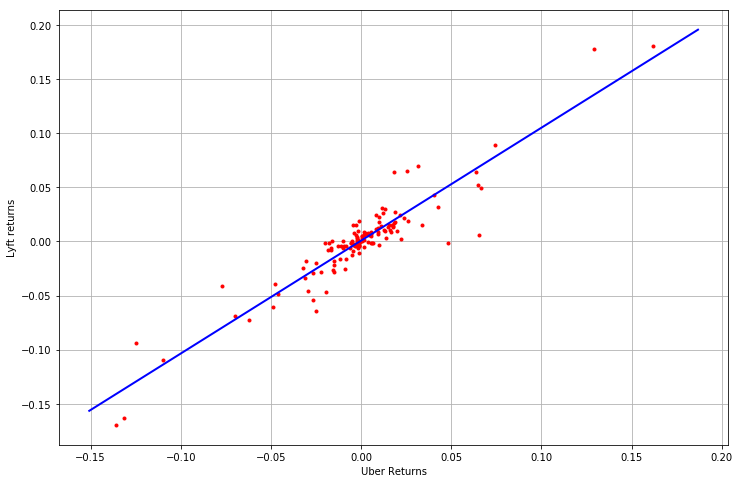

In [31]:
plt.figure(figsize=(12,8))
plt.plot(return_data['Goldman Sachs Return'], return_data['Morgan Stanley Return'], 'r.')

ax = plt.axis()
x = np.linspace(ax[0], ax[1] + 0.01)

plt.plot(x, model.params[0] + model.params[1] * x, 'b', lw=2)

plt.grid(True)
plt.axis('tight')
plt.xlabel('Uber Returns')
plt.ylabel('Lyft returns')

plt.show()

**Investment Broke Share Companies stock 30 day windows correlation**

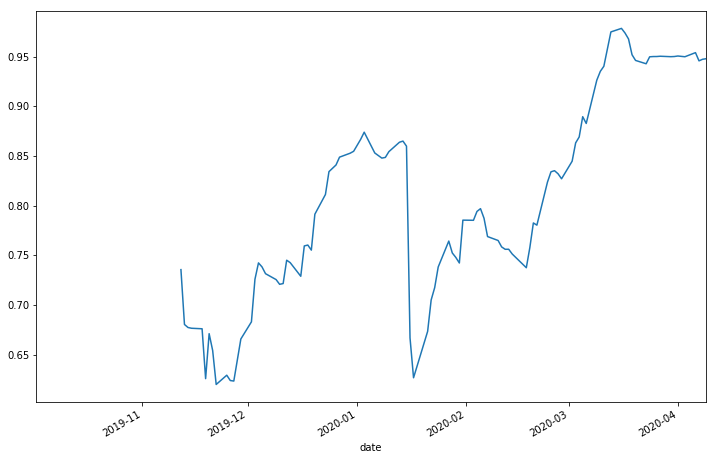

In [32]:
plt.figure(figsize=(12,8))
return_data['Morgan Stanley Return'].rolling(window=30).corr(return_data['Goldman Sachs Return']).plot()
plt.show()

**Investment Broke Share Companies stock 5 day windows correlation**

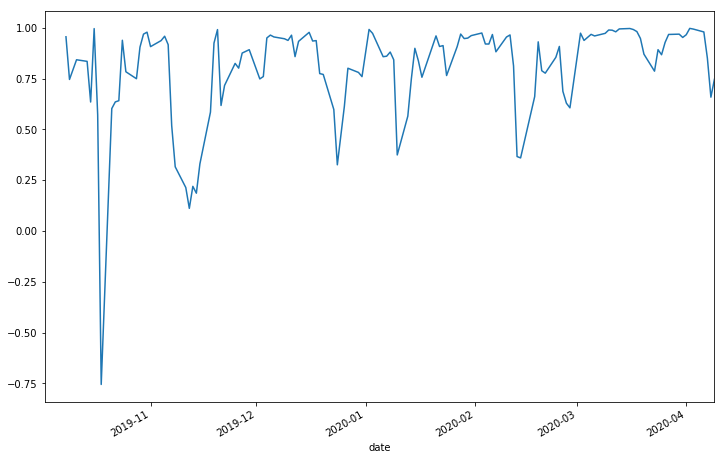

In [33]:
plt.figure(figsize=(12,8))
return_data['Morgan Stanley Return'].rolling(window=5).corr(return_data['Goldman Sachs Return']).plot()
plt.show()

<a id='tradingstrategy'></a>
## Trading Strategy 
 Goldman Sachs

**Established short and long windows parameters based on the number of observations**

In [34]:
short_window = 5
long_window = 15

**Empty `signals` DataFrame with a `signal` column starting at zero**

In [35]:
signals = pd.DataFrame(index = gs_df.index)
signals['signal'] = 0.0

**Simple moving average over the short window and the long window**

In [36]:
signals['short_mavg'] =gs_df['close'].rolling(window = short_window,
                                                 min_periods = 1,
                                                 center = False).mean()
signals['long_mavg'] = gs_df['close'].rolling(window = long_window,
                                                min_periods = 1,
                                                center = False).mean()

**Determine Trading signal**

In [37]:
signals['signal'][short_window:] = np.where(signals['short_mavg'][short_window:] 
                                            > signals['long_mavg'][short_window:],
                                            1.0, 0.0)

**Create Trading Orders**

In [38]:
signals['positions'] = signals['signal'].diff()
signals['positions'][0] = 1
signals.head(10)

,signal,short_mavg,long_mavg,positions
date,,,,
2019-10-01,0.0,202.690000,202.690000,1.0
2019-10-02,0.0,200.470000,200.470000,0.0
2019-10-03,0.0,199.393333,199.393333,0.0
2019-10-04,0.0,199.745000,199.745000,0.0
2019-10-07,0.0,199.876000,199.876000,0.0
2019-10-08,0.0,198.812000,199.458333,0.0
2019-10-09,0.0,198.532000,199.085714,0.0
2019-10-10,0.0,199.058000,199.183750,0.0
2019-10-11,1.0,199.834000,199.794444,1.0


**Trading strategy and signals for a 5 day short and 15 day long strategy**

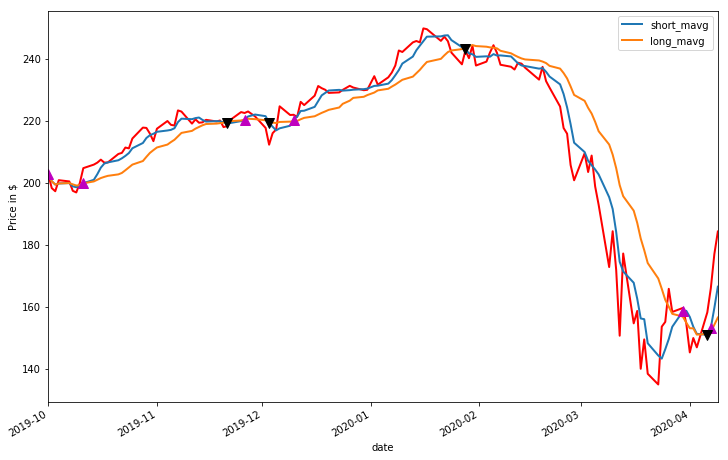

In [39]:
# Initialize the plot figure
fig = plt.figure(figsize=(12,8))

# Add a subplot and label for y-axis
ax1 = fig.add_subplot(111,  ylabel='Price in $')

# Plot the closing price
gs_df['close'].plot(ax=ax1, color='r', lw=2.)

# Plot the short and long moving averages
signals[['short_mavg', 'long_mavg']].plot(ax=ax1, lw=2.)

# Plot the buy signals
ax1.plot(signals.loc[signals.positions == 1.0].index, 
         signals.short_mavg[signals.positions == 1.0],
         '^', markersize=10, color='m')
         
# Plot the sell signals
ax1.plot(signals.loc[signals.positions == -1.0].index, 
         signals.short_mavg[signals.positions == -1.0],
         'v', markersize=10, color='k')
         
# Show the plot
plt.show()

<a id='backtesting'></a>
## Backtesting 


**Determine the initial capital to invest**

In [40]:
initial_capital= float(10000.0)

**Empty dataFrame to hold the positions**

In [41]:
positions = pd.DataFrame(index = signals.index).fillna(0.0)

**Make a Buy order of 49 shares**

In [42]:
positions['Goldman Sachs'] = 49 * signals['signal']

**Initialize portfolio with value owned**

In [43]:
portfolio = pd.DataFrame(index = positions.index).fillna(0.0)

**Keep track of the owned shares**

In [44]:
pos_diff = positions.diff()
pos_diff['Goldman Sachs'][0]=0
pos_diff.head(10)

,Goldman Sachs
date,
2019-10-01,0.0
2019-10-02,0.0
2019-10-03,0.0
2019-10-04,0.0
2019-10-07,0.0
2019-10-08,0.0
2019-10-09,0.0
2019-10-10,0.0
2019-10-11,49.0


**Add `holdings` to portfolio**

In [45]:
portfolio['holdings'] = positions.multiply(gs_df['adj_close'], axis=0)
portfolio.head(10)

,holdings
date,
2019-10-01,0.000000
2019-10-02,0.000000
2019-10-03,0.000000
2019-10-04,0.000000
2019-10-07,0.000000
2019-10-08,0.000000
2019-10-09,0.000000
2019-10-10,0.000000
2019-10-11,9912.481707


**Calculate remainder `cash` on portfolio**

In [46]:
portfolio['cash'] = initial_capital - (pos_diff.multiply(gs_df['adj_close'], 
                                                         axis=0)).sum(axis=1).cumsum()   

**Create a `total` portfolio value column**

In [47]:
portfolio['total'] = portfolio['cash'] + portfolio['holdings']
portfolio.head(10)

,holdings,cash,total
date,,,
2019-10-01,0.000000,10000.000000,10000.000000
2019-10-02,0.000000,10000.000000,10000.000000
2019-10-03,0.000000,10000.000000,10000.000000
2019-10-04,0.000000,10000.000000,10000.000000
2019-10-07,0.000000,10000.000000,10000.000000
2019-10-08,0.000000,10000.000000,10000.000000
2019-10-09,0.000000,10000.000000,10000.000000
2019-10-10,0.000000,10000.000000,10000.000000
2019-10-11,9912.481707,87.518293,10000.000000


**Create a portfolio `returns` column**

In [48]:
portfolio['returns'] = portfolio['total'].pct_change()
portfolio['returns'][0]=0

In [49]:
portfolio['signal'] = [ 'short' if i == 0 else 'long' for i in signals['signal']]

In [50]:
portfolio

,holdings,cash,total,returns,signal
date,,,,,
2019-10-01,0.000000,10000.000000,10000.000000,0.000000,short
2019-10-02,0.000000,10000.000000,10000.000000,0.000000,short
2019-10-03,0.000000,10000.000000,10000.000000,0.000000,short
2019-10-04,0.000000,10000.000000,10000.000000,0.000000,short
2019-10-07,0.000000,10000.000000,10000.000000,0.000000,short
2019-10-08,0.000000,10000.000000,10000.000000,0.000000,short
2019-10-09,0.000000,10000.000000,10000.000000,0.000000,short
2019-10-10,0.000000,10000.000000,10000.000000,0.000000,short
2019-10-11,9912.481707,87.518293,10000.000000,0.000000,long


**Strategy and signals for a 5 day short and 15 day long Portfolio**

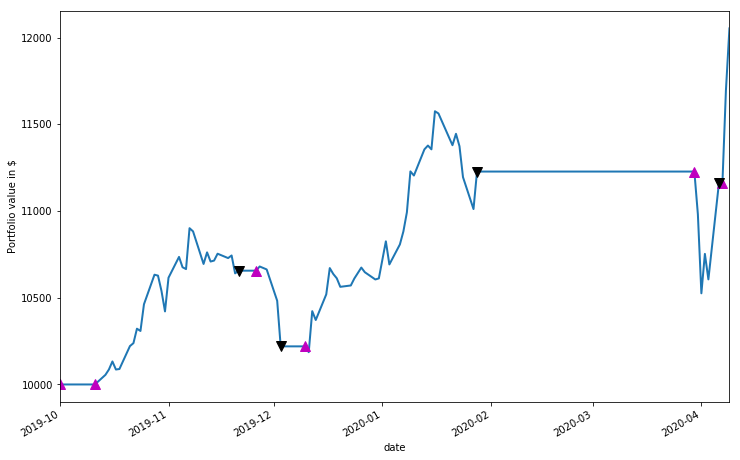

In [72]:
# Initialize the plot figure
fig = plt.figure(figsize=(12,8))

ax1 = fig.add_subplot(111, ylabel='Portfolio value in $')

# Plot the equity curve in dollars
portfolio['total'].plot(ax=ax1, lw=2.)

# Plot the "buy" trades against the equity curve
ax1.plot(portfolio.loc[signals.positions == 1.0].index, 
         portfolio.total[signals.positions == 1.0],
         '^', markersize=10, color='m')

# Plot the "sell" trades against the equity curve
ax1.plot(portfolio.loc[signals.positions == -1.0].index, 
         portfolio.total[signals.positions == -1.0],
         'v', markersize=10, color='k')

# Show the plot
plt.show()

<a id='evaluating'></a>
## Evaluating The Trading Strategy

### Sharpe Ratio
**For 133 Trading days**

In [52]:
# 133 Days Sharpe ratio
returns = portfolio['returns']
sharpe_ratio_133 = np.sqrt(133) * (returns.mean() / returns.std())
print(sharpe_ratio_133)

1.5291195597858747


In [53]:
# Annualized Sharpe ratio (252 trading days)
sharpe_ratio_252 = np.sqrt(252) * (returns.mean() / returns.std())
print(sharpe_ratio_252)

2.1048245159046406


**Portfolio 133 trading days Sharpe Ratio: 1.5291195597858747**

**Portfolio Sharpe Ratio: 2.1048245159046406**

https://seekingalpha.com/article/4239442-your-sharpe-ratio-is-low-for-reasons-bad-golf

### Maximum Drawdown
https://www.investopedia.com/terms/m/maximum-drawdown-mdd.asp

In [54]:
# Define a trailing 12 trading day window
max_window = 12

In [55]:
# Calculate the max drawdown in the past window days for each day
rolling_max = gs_df['adj_close'].rolling(max_window, min_periods=1).max()
daily_drawdown = gs_df['adj_close']/rolling_max - 1.0

In [56]:
# Calculate the minimum (negative) daily drawdown
max_daily_drawdown = daily_drawdown.rolling(max_window, min_periods=1).min()

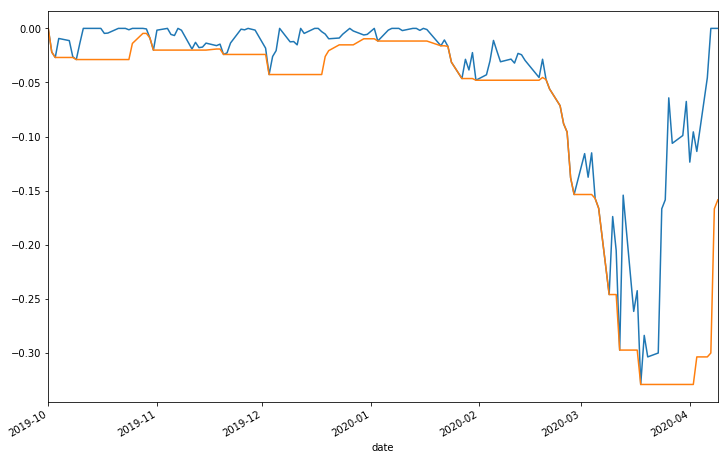

In [57]:
fig = plt.figure(figsize=(12,8))

# Plot the results
daily_drawdown.plot()
max_daily_drawdown.plot()

# Show the plot
plt.show()

### Compound Annual Growth Rate (CAGR)

**What CAGR Can Tell You**

The compound annual growth rate isn't a true return rate, but rather a representational figure. It is essentially a number that describes the rate at which an investment would have grown if it had grown the same rate every year and the profits were reinvested at the end of each year. 

https://www.investopedia.com/terms/c/cagr.asp

**Calculate the CAGR**

In [58]:
days = (ms_df.index[-1] - ms_df.index[0]).days

cagr_ms = ((((ms_df['adj_close'][-1]) / ms_df['adj_close'][1])) ** (365.0/days)) - 1

print(cagr_ms)

0.06902513356815554


<a id='backtrader'></a>

### Backtrader 

* https://www.backtrader.com/

**Strategy Overview**

Given current market conditions and increase in volatility we may be able to take advantage of a simple short/long strategy with the following entry and exit parameters:
 
**Entry**

* When 5 day moving average greater than 15 day moving average buy

**Exit**

* When 15 day moving average greater than 5 day moving average sell

**Trade Management and Position Sizing**

* One open position either buy or sell at a given time.
* Position size buy/sell 49 shares at a time without 
* Backtrader will reject order if not enough funds

In [59]:
!pip install backtrader

You should consider upgrading via the 'pip install --upgrade pip' command.


In [101]:
import backtrader as bt

In [102]:
gs_data = gs_df[['open', 'high', 'low', 'close', 'volume']]
gs_data.index = pd.DatetimeIndex(gs_data.index)
gs_data.head()

,open,high,low,close,volume
date,,,,,
2019-10-01,207.01,209.380,202.61,202.69,3171507.0
2019-10-02,201.69,201.880,197.60,198.25,3395299.0
2019-10-03,197.61,198.370,193.99,197.24,2923698.0
2019-10-04,196.99,201.226,196.04,200.80,3028781.0
2019-10-07,200.79,202.530,199.47,200.40,2210318.0


In [103]:
gs_data.to_csv("../data/gs_data.csv")

In [ ]:
bt.version

**Backtrader Strategy Class**

In [78]:
class SMAStrategy(bt.Strategy):
    
    def __init__(self):
        signal_short = bt.ind.SMA(period = 5)
        signal_long = bt.ind.SMA(period = 15)
        self.sma_diff = signal_short - signal_long

    def next(self):
        if not self.position:
            if self.sma_diff >= 0:
                self.buy(size = 49)
        else:
            if self.sma_diff < 0:
                self.sell(size = 49)

**Backtrader Start**

In [76]:
cerebro = bt.Cerebro()
cerebro.addstrategy(SMAStrategy)

0

In [79]:
# Pass it to the backtrader datafeed and add it to the cerebro
data = bt.feeds.PandasData(dataname = gs_data)

#Add the data to Cerebro
cerebro.adddata(data)

In [80]:
startcash=10000
cerebro.broker.setcash(startcash)
cerebro.broker.setcommission(commission = 0)

In [81]:
cerebro.run()

## Goldman Sachs Final Portfolio Value


In [84]:
gs_portfolio_value = cerebro.broker.getvalue()
print('Final Portfolio Value: ${}'.format(gs_portfolio_value))

Final Portfolio Value: $11155.42


In [85]:
gs_pnl = gs_portfolio_value - startcash
print('P/L: ${}'.format(gs_pnl))

P/L: $1155.42


### Backtrader Visualization

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/backtrader/plot/__init__.py:30: UserWarning:


This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/home/nbuser/anaconda3_420/lib/python3.5/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/home/nbuser/anaconda3_420/lib/python3.5/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/home/nbuser/anaconda3_420/lib/python3.5/site-packages/ipykernel/__main__.py", line 3, in <module>
    app.launch_new_instance()
  File "/home/nbuser/anaconda3_420/lib/python3.5/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/home/nbuser/anaconda3_420/lib/python3.5/site-packages/ipykernel/kern

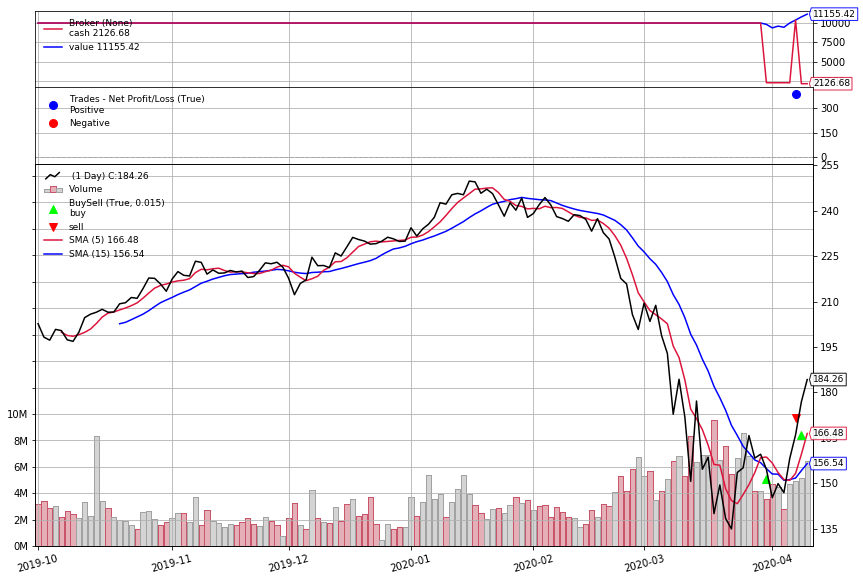

[[<matplotlib.figure.Figure at 0x7fb1b4890cf8>]]

In [86]:
plt.rcParams['figure.figsize'] = [12, 8]
cerebro.plot()